In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Columnas de = Electricidad, Continentes, Nuevos Nombres de Columnas

In [ ]:
col_electricity = ['low_carbon_electricity',
            'nuclear_electricity',
            'oil_electricity',
            'other_renewable_electricity',
            'other_renewable_exc_biofuel_electricity',
            'solar_electricity',
            'wind_electricity',
            'fossil_electricity',
            'gas_electricity',
            'hydro_electricity',
            'biofuel_electricity',
            'coal_electricity']
col_cons =['biofuel_consumption',
           'coal_consumption',
           'fossil_fuel_consumption',
           'gas_consumption',
           'hydro_consumption',
           'low_carbon_consumption',
           'nuclear_consumption',
           'oil_consumption',
           'solar_consumption']

continent_map = {
    'Africa': ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
               'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic',
               'Chad', 'Comoros', 'Congo', 'Cote d\'Ivoire', 'Democratic Republic of the Congo',
               'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini',
               'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya',
               'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
               'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda',
               'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia',
               'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia',
               'Uganda', 'Zambia', 'Zimbabwe'],
    'Asia': ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan',
             'Brunei Darussalam', 'Cambodia', 'China', 'Cyprus', 'Georgia', 'India',
             'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait',
             'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia','Maldives', 'Mongolia', 'Myanmar', 'Nepal',
             'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Saudi Arabia',
             'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan',
             'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates',
             'Uzbekistan', 'Vietnam', 'Yemen'],
    'Europe': ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina',
               'Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Estonia', 'Finland',
               'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy',
               'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta',
               'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway',
               'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia',
               'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Vatican City'],
    'North America': ['Canada', 'Greenland', 'Mexico', 'United States'],
    'Oceania': ['Australia', 'Fiji', 'New Zealand', 'Papua New Guinea'],
    'South America': ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador',
                      'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']
}

rename_columns = {
    'nuclear_electricity': 'nuclear',
    'oil_electricity': 'petroleo',
    'solar_electricity': 'solar',
    'wind_electricity': 'eolica',
    'fossil_electricity': 'fosil',
    'gas_electricity': 'gas',
    'hydro_electricity': 'hidro',
    'biofuel_electricity': 'bio fuel',
    }


In [92]:
data = pd.read_csv ("World Energy Consumption.csv", index_col='year')
data.index = pd.to_datetime(data.index,format='%Y')

## Generacion Data Set desde DataFrmae base

In [93]:
continente = 'South America'
data['continente'] = data['country'].map(lambda x: next((k for k, v in continent_map.items() if x in v), None))
df_continente = data[data['continente'] == 'South America']
df_continente = df_continente.groupby(['year', 'continente'])[col_electricity].sum().reset_index('continente')
df_continente = df_continente[df_continente.index.year > 1970]
df_continente['carbon'] = df_continente['low_carbon_electricity'] + df_continente['coal_electricity']
df_continente['renovable']  = df_continente['other_renewable_electricity'] + df_continente['other_renewable_exc_biofuel_electricity']
df_continente.head(3)

,continente,low_carbon_electricity,nuclear_electricity,oil_electricity,other_renewable_electricity,other_renewable_exc_biofuel_electricity,solar_electricity,wind_electricity,fossil_electricity,gas_electricity,hydro_electricity,biofuel_electricity,coal_electricity,carbon,renovable
year,,,,,,,,,,,,,,,
1971-01-01,South America,9.903,0.0,0.0,0.985,0.0,0.0,0.0,0.0,0.0,66.093,0.0,0.0,9.903,0.985
1972-01-01,South America,10.682,0.0,0.0,1.077,0.0,0.0,0.0,0.0,0.0,75.929,0.0,0.0,10.682,1.077
1973-01-01,South America,11.224,0.0,0.0,1.092,0.0,0.0,0.0,0.0,0.0,85.654,0.0,0.0,11.224,1.092


## Depuracion y Data Set Final

In [94]:
df_continente.drop(columns=['low_carbon_electricity','other_renewable_electricity','other_renewable_exc_biofuel_electricity','coal_electricity'],inplace=True)
df_continente.rename(columns=rename_columns,inplace=True)
df_continente.head(3)

,continente,nuclear,petroleo,solar,eolica,fosil,gas,hidro,bio fuel,carbon,renovable
year,,,,,,,,,,,
1971-01-01,South America,0.0,0.0,0.0,0.0,0.0,0.0,66.093,0.0,9.903,0.985
1972-01-01,South America,0.0,0.0,0.0,0.0,0.0,0.0,75.929,0.0,10.682,1.077
1973-01-01,South America,0.0,0.0,0.0,0.0,0.0,0.0,85.654,0.0,11.224,1.092


### Grafico historico por continente y distribucion porcentual. Explicado por etapa

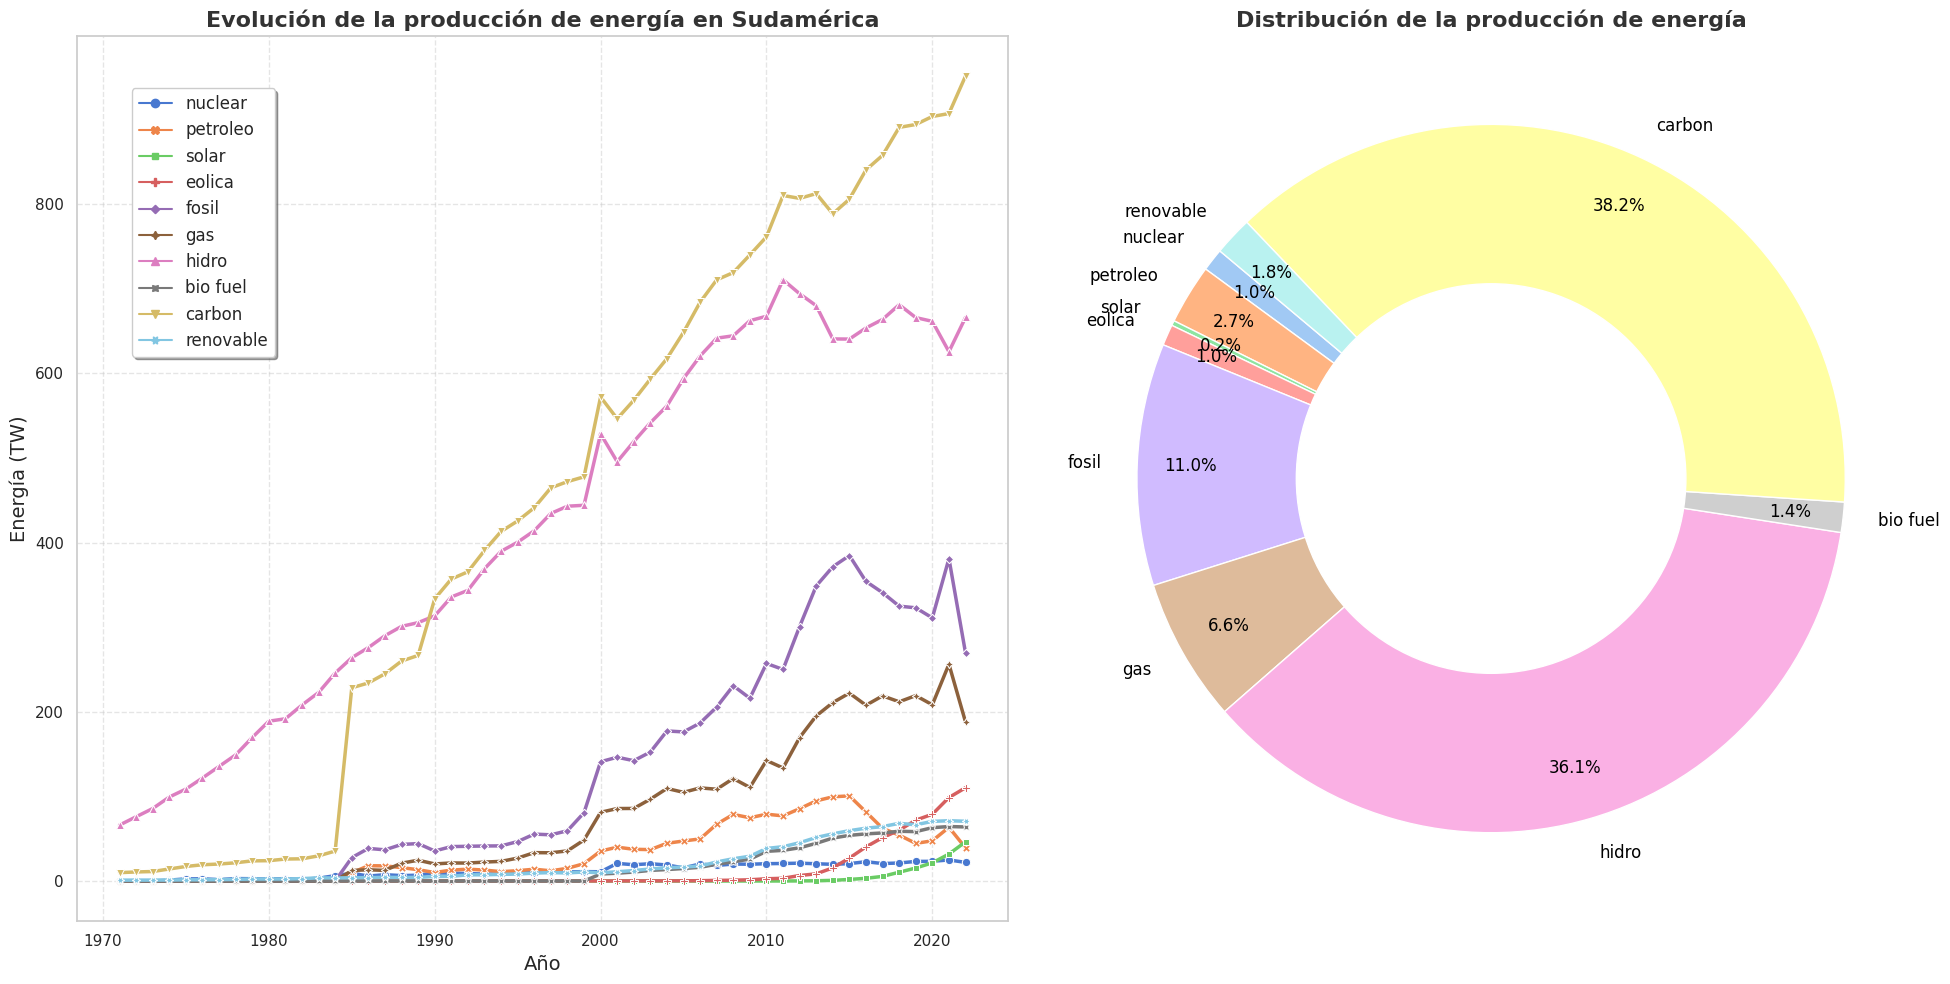

In [ ]:
# Configurar el estilo global
sns.set_theme(style="whitegrid")

# Crear la figura y los ejes
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# --- Gráfico de líneas ---
sns.lineplot(
    data=df_continente[['nuclear', 'petroleo', 'solar', 'eolica', 'fosil', 'gas', 'hidro', 'bio fuel', 'carbon', 'renovable']],
    palette='muted',
    linestyle='-',
    markers=True,
    dashes=False,
    ax=ax[0],
    linewidth=2.5
)

# Personalizar el gráfico de líneas
ax[0].set_title('Evolución de la producción de energía en Sudamérica', fontsize=16, weight='bold', color='#333333')
ax[0].set_xlabel('Año', fontsize=14)
ax[0].set_ylabel('Energía (TW)', fontsize=14)
ax[0].legend(loc='upper left', bbox_to_anchor=(0.05, 0.95), fontsize=12, frameon=True, shadow=True)
ax[0].grid(True, linestyle='--', alpha=0.5)

#Gráfico de pastel
# Calcular totales y porcentajes
totals = df_continente[['nuclear', 'petroleo', 'solar', 'eolica', 'fosil', 'gas', 'hidro', 'bio fuel', 'carbon', 'renovable']].sum()
porcentajes = (totals / totals.sum()) * 100

# Definir una paleta de colores pastel
colors = sns.color_palette('pastel', len(totals))

# Crear el gráfico de pastel
patches, texts, autotexts = ax[1].pie(
    porcentajes,
    labels=totals.index,
    colors=colors,
    autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '',
    textprops={'color':"black", 'fontsize':12},
    pctdistance=0.85,
    startangle=140,
    wedgeprops=dict(edgecolor='w')
)

# Convertir el gráfico de pastel en un donut agregando un círculo en el centro
centre_circle = plt.Circle((0, 0), 0.55, fc='white')
ax[1].add_artist(centre_circle)

# Personalizar el gráfico de pastel
ax[1].set_title('Distribución de la producción de energía', fontsize=16, weight='bold', color='#333333')

plt.tight_layout()
plt.show()


### version ms simple y menos "pesada"

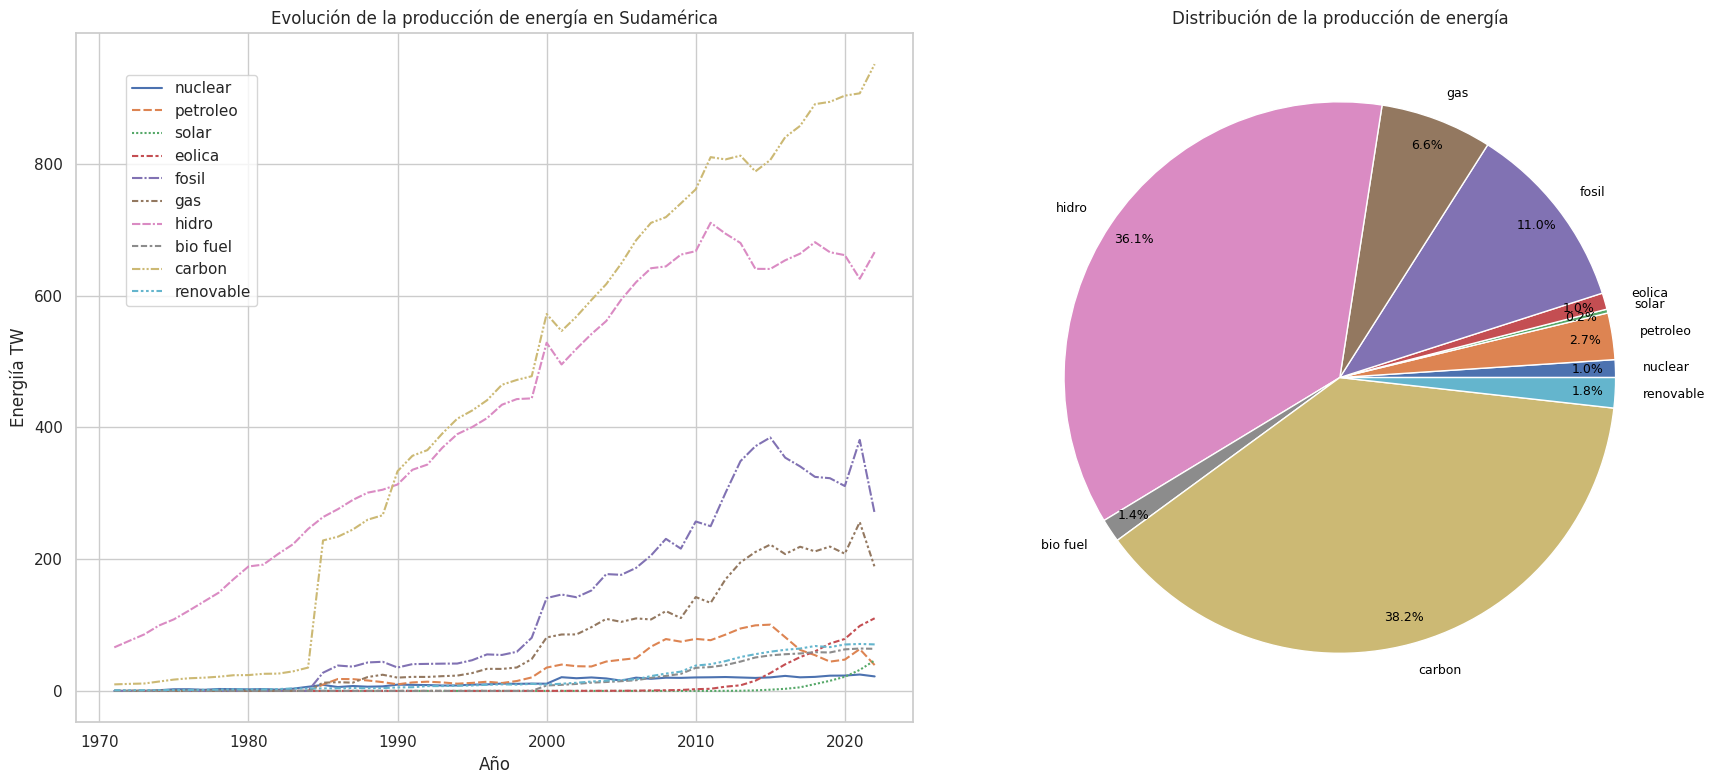

In [96]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.lineplot(data=df_continente[['nuclear', 'petroleo', 'solar', 'eolica', 'fosil', 'gas', 'hidro', 'bio fuel', 'carbon', 'renovable']], palette='deep',linestyle='-',ax=ax[0])

# Personalizar el gráfico
ax[0].set_title('Evolución de la producción de energía en Sudamérica')
ax[0].set_xlabel('Año')
ax[0].set_ylabel('Energiía TW')
ax[0].legend(loc='upper left', bbox_to_anchor=(0.05, 0.95))
ax[0].grid(True)


totals = df_continente[['nuclear', 'petroleo', 'solar', 'eolica', 'fosil', 'gas', 'hidro', 'bio fuel', 'carbon', 'renovable']].sum()

# Calcular el porcentaje de cada columna con respecto al total
porcentajes = (totals / totals.sum()) * 100

# Crear el gráfico circular

ax[1].pie(porcentajes, labels=totals.index, autopct=lambda p : '{:.1f}%'.format(p) if p > 0 else '', textprops={'color':'black', 'fontsize':9}, pctdistance=0.9)
ax[1].set_title('Distribución de la producción de energía')

plt.tight_layout()
plt.show()